# PROJETO: Modelagem de dados da SSP-SP / Modeling of SSP-SP data

## João Leopoldo e Silva - fev/2020

#### dataset: https://www.kaggle.com/inquisitivecrow/crime-data-in-brazil
## 2008

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import joblib

In [3]:
pd.options.display.max_columns = 200

In [4]:
data_2008_1 = pd.read_csv('crime-data-in-brazil/BO_2008_1.csv', low_memory=False)
data_2008_2 = pd.read_csv('crime-data-in-brazil/BO_2008_2.csv', low_memory=False)
data_2008 = pd.concat([data_2008_1, data_2008_2], ignore_index=True)

In [5]:
def hora(x):
    try:
        if int(x[:2]) < 6:
            return 'Madrugada'
        elif int(x[:2]) < 12:
            return 'Manhã'
        elif int(x[:2]) < 18:
            return 'Tarde'
        else:
            return 'Noite'
    except:
        return 'Indeterminado'

In [6]:
rub_dict = joblib.load('rub_dict')

In [7]:
data_2008['hora'] = data_2008.HORA_OCORRENCIA_BO.apply(hora)

In [8]:
data_2008.sample()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO,hora
404523,4134,2008,10247,DECAP,DEL.SEC.6º SANTO AMARO,47º D.P. CAPAO REDONDO,DECAP,DEL.SEC.3º OESTE,89º D.P. JARDIM TABOAO,2008,6,13/06/2008,18:30,C,Roubo (art. 157),NaN,INTERIOR TRANSPORTE COLETIVO,NaN,NaN,S.PAULO,AV GIOVANNI GRONCHI,2000,C,Indiciado,3.0,M,NaN,NaN,NaN,NaN,Noite


In [9]:
target = data_2008.RUBRICA.apply(lambda x: rub_dict[x])

In [10]:
data_2008f = data_2008[['NOME_DEPARTAMENTO_CIRC','NOME_SECCIONAL_CIRC',
                       'IDADE_PESSOA','FLAG_STATUS', 'DESCR_TIPO_PESSOA',
                       'SEXO_PESSOA','COR', 'hora','CONDUTA','DESCR_PROFISSAO','DESCR_GRAU_INSTRUCAO']]

In [11]:
data_2008f = pd.get_dummies(data=data_2008f, columns=['NOME_DEPARTAMENTO_CIRC','NOME_SECCIONAL_CIRC',
                                                       'FLAG_STATUS', 'DESCR_TIPO_PESSOA', 
                                                       'SEXO_PESSOA','COR', 'hora'])

In [12]:
data_2008f.loc[data_2008f['IDADE_PESSOA'] == '. 25 ANOS                         '] = '25'
data_2008f.loc[data_2008f['IDADE_PESSOA'] == ' 21 ANOS                          '] = '21'
data_2008f.loc[data_2008f['IDADE_PESSOA'] == ' 20 ANOS                         '] = '20'
data_2008f.loc[data_2008f['IDADE_PESSOA'] == '17/18 ANOS                  '] = '17'
data_2008f.loc[data_2008f['IDADE_PESSOA'] == ' IDADE NÃO OBSERVADA                '] = '0'
data_2008f.loc[data_2008f['IDADE_PESSOA'] == '21 ANOS            '] = '21'
data_2008f.loc[data_2008f['IDADE_PESSOA'] == '+/- 30 ANOS                                  '] = '30'
data_2008f.loc[data_2008f['IDADE_PESSOA'] == '+/- 20 ANOS                                  '] = '20'
data_2008f.loc[data_2008f['IDADE_PESSOA'] == '+/- 18 ANOS                                  '] = '18'
data_2008f.loc[data_2008f['IDADE_PESSOA'] == '  25 ANOS         '] = '25'

In [13]:
data_2008f['IDADE_PESSOA'] = pd.to_numeric(data_2008f['IDADE_PESSOA'])

In [14]:
conduta = joblib.load('conduta7')
conduta_2008 = pd.get_dummies(data_2008f.CONDUTA.where(data_2008f.CONDUTA.isin(conduta), other='Other'))

profissao = joblib.load('profissao7')
profissao_2008 = pd.get_dummies(data_2008f.DESCR_PROFISSAO.where(data_2008f.DESCR_PROFISSAO.isin(profissao), other='Other'))

instrucao = joblib.load('instrucao7')
instucao_2008 = pd.get_dummies(data_2008f.DESCR_GRAU_INSTRUCAO.where(data_2008f.DESCR_GRAU_INSTRUCAO.isin(instrucao), other='Other'))

In [15]:
# conduta = data_2008.CONDUTA.value_counts().nlargest(7).index
# joblib.dump(conduta, 'conduta08')

In [16]:
data_2008f = pd.concat([data_2008f, conduta_2008, profissao_2008, instucao_2008], axis=1).drop(columns=['CONDUTA','DESCR_PROFISSAO','DESCR_GRAU_INSTRUCAO'])

In [17]:
data_2008f.sample()

,IDADE_PESSOA,NOME_DEPARTAMENTO_CIRC_DECAP,NOME_DEPARTAMENTO_CIRC_DEMACRO,NOME_SECCIONAL_CIRC_DEL.SEC.1º CENTRO,NOME_SECCIONAL_CIRC_DEL.SEC.2º SUL,NOME_SECCIONAL_CIRC_DEL.SEC.3º OESTE,NOME_SECCIONAL_CIRC_DEL.SEC.4º NORTE,NOME_SECCIONAL_CIRC_DEL.SEC.5º LESTE,NOME_SECCIONAL_CIRC_DEL.SEC.6º SANTO AMARO,NOME_SECCIONAL_CIRC_DEL.SEC.7º ITAQUERA,NOME_SECCIONAL_CIRC_DEL.SEC.8º SAO MATEUS,NOME_SECCIONAL_CIRC_DEL.SEC.CARAPICUIBA,NOME_SECCIONAL_CIRC_DEL.SEC.DIADEMA,NOME_SECCIONAL_CIRC_DEL.SEC.FRANCO DA ROCHA,NOME_SECCIONAL_CIRC_DEL.SEC.GUARULHOS,NOME_SECCIONAL_CIRC_DEL.SEC.MOGI DAS CRUZES,NOME_SECCIONAL_CIRC_DEL.SEC.OSASCO,NOME_SECCIONAL_CIRC_DEL.SEC.S.BERNARDO DO CAMPO,NOME_SECCIONAL_CIRC_DEL.SEC.SANTO ANDRÉ,NOME_SECCIONAL_CIRC_DEL.SEC.TABOÃO DA SERRA,FLAG_STATUS_C,FLAG_STATUS_T,DESCR_TIPO_PESSOA_Adolescente,DESCR_TIPO_PESSOA_Adolescente infrator,DESCR_TIPO_PESSOA_Advogado,DESCR_TIPO_PESSOA_Autor,DESCR_TIPO_PESSOA_Autor/Vitima,DESCR_TIPO_PESSOA_Averiguado,DESCR_TIPO_PESSOA_Condutor,DESCR_TIPO_PESSOA_Criança,DESCR_TIPO_PESSOA_Curador,DESCR_TIPO_PESSOA_Declarante,DESCR_TIPO_PESSOA_Desaparecido,DESCR_TIPO_PESSOA_Indiciado,DESCR_TIPO_PESSOA_Partes,DESCR_TIPO_PESSOA_Representante,DESCR_TIPO_PESSOA_Testemunha,DESCR_TIPO_PESSOA_Vítima,SEXO_PESSOA_,SEXO_PESSOA_F,SEXO_PESSOA_I,SEXO_PESSOA_M,COR_Amarela,COR_Branca,COR_Outros,COR_Parda,COR_Preta,COR_Vermelha,hora_Indeterminado,hora_Madrugada,hora_Manhã,hora_Noite,hora_Tarde,ESTABELECIMENTO COMERCIAL,INTERIOR DE VEICULO,INTERIOR TRANSPORTE COLETIVO,OUTROS,Other,RESIDENCIA,TRANSEUNTE,VEICULO,AJUDANTE,APOSENTADO(A),AUTONOMO(A),AUXILIAR ADMINISTRATIVO,COMERCIANTE,DESOCUPADO(A),DO LAR,DOMESTICA,ESTUDANTE,GERENTE,MOTO-BOY,MOTORISTA,Other,POLICIAL MILITAR,PROFESSOR(A),VENDEDOR(A),1 Grau completo,1 Grau incompleto,2 Grau completo,2 Grau incompleto,Analfabeto,Other,Superior completo,Superior incompleto
939112,47.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
data_2008f = data_2008f.fillna(0)

In [19]:
data_2008f = data_2008f.apply(pd.to_numeric, downcast='integer')

In [20]:
data_2008f.shape

(1490002, 85)

In [25]:
col_dict = {x: col for x, col in enumerate(data_2008f.columns)}
col_dict

{0: 'IDADE_PESSOA',
 1: 'NOME_DEPARTAMENTO_CIRC_DECAP                                   ',
 2: 'NOME_DEPARTAMENTO_CIRC_DEMACRO                                 ',
 3: 'NOME_SECCIONAL_CIRC_DEL.SEC.1º CENTRO                       ',
 4: 'NOME_SECCIONAL_CIRC_DEL.SEC.2º SUL                          ',
 5: 'NOME_SECCIONAL_CIRC_DEL.SEC.3º OESTE                        ',
 6: 'NOME_SECCIONAL_CIRC_DEL.SEC.4º NORTE                        ',
 7: 'NOME_SECCIONAL_CIRC_DEL.SEC.5º LESTE                        ',
 8: 'NOME_SECCIONAL_CIRC_DEL.SEC.6º SANTO AMARO                  ',
 9: 'NOME_SECCIONAL_CIRC_DEL.SEC.7º ITAQUERA                     ',
 10: 'NOME_SECCIONAL_CIRC_DEL.SEC.8º SAO MATEUS                   ',
 11: 'NOME_SECCIONAL_CIRC_DEL.SEC.CARAPICUIBA                     ',
 12: 'NOME_SECCIONAL_CIRC_DEL.SEC.DIADEMA                         ',
 13: 'NOME_SECCIONAL_CIRC_DEL.SEC.FRANCO DA ROCHA                 ',
 14: 'NOME_SECCIONAL_CIRC_DEL.SEC.GUARULHOS                       ',
 15: 'NOME_SECCIO

In [20]:
data_2008f.sample()

,IDADE_PESSOA,NOME_DEPARTAMENTO_CIRC_DECAP,NOME_DEPARTAMENTO_CIRC_DEMACRO,NOME_SECCIONAL_CIRC_DEL.SEC.1º CENTRO,NOME_SECCIONAL_CIRC_DEL.SEC.2º SUL,NOME_SECCIONAL_CIRC_DEL.SEC.3º OESTE,NOME_SECCIONAL_CIRC_DEL.SEC.4º NORTE,NOME_SECCIONAL_CIRC_DEL.SEC.5º LESTE,NOME_SECCIONAL_CIRC_DEL.SEC.6º SANTO AMARO,NOME_SECCIONAL_CIRC_DEL.SEC.7º ITAQUERA,NOME_SECCIONAL_CIRC_DEL.SEC.8º SAO MATEUS,NOME_SECCIONAL_CIRC_DEL.SEC.CARAPICUIBA,NOME_SECCIONAL_CIRC_DEL.SEC.DIADEMA,NOME_SECCIONAL_CIRC_DEL.SEC.FRANCO DA ROCHA,NOME_SECCIONAL_CIRC_DEL.SEC.GUARULHOS,NOME_SECCIONAL_CIRC_DEL.SEC.MOGI DAS CRUZES,NOME_SECCIONAL_CIRC_DEL.SEC.OSASCO,NOME_SECCIONAL_CIRC_DEL.SEC.S.BERNARDO DO CAMPO,NOME_SECCIONAL_CIRC_DEL.SEC.SANTO ANDRÉ,NOME_SECCIONAL_CIRC_DEL.SEC.TABOÃO DA SERRA,FLAG_STATUS_C,FLAG_STATUS_T,DESCR_TIPO_PESSOA_Adolescente,DESCR_TIPO_PESSOA_Adolescente infrator,DESCR_TIPO_PESSOA_Advogado,DESCR_TIPO_PESSOA_Autor,DESCR_TIPO_PESSOA_Autor/Vitima,DESCR_TIPO_PESSOA_Averiguado,DESCR_TIPO_PESSOA_Condutor,DESCR_TIPO_PESSOA_Criança,DESCR_TIPO_PESSOA_Curador,DESCR_TIPO_PESSOA_Declarante,DESCR_TIPO_PESSOA_Desaparecido,DESCR_TIPO_PESSOA_Indiciado,DESCR_TIPO_PESSOA_Partes,DESCR_TIPO_PESSOA_Representante,DESCR_TIPO_PESSOA_Testemunha,DESCR_TIPO_PESSOA_Vítima,SEXO_PESSOA_,SEXO_PESSOA_F,SEXO_PESSOA_I,SEXO_PESSOA_M,COR_Amarela,COR_Branca,COR_Outros,COR_Parda,COR_Preta,COR_Vermelha,hora_Indeterminado,hora_Madrugada,hora_Manhã,hora_Noite,hora_Tarde,ESTABELECIMENTO COMERCIAL,INTERIOR DE VEICULO,INTERIOR TRANSPORTE COLETIVO,OUTROS,Other,RESIDENCIA,TRANSEUNTE,VEICULO,AJUDANTE,APOSENTADO(A),AUTONOMO(A),AUXILIAR ADMINISTRATIVO,COMERCIANTE,DESOCUPADO(A),DO LAR,DOMESTICA,ESTUDANTE,GERENTE,MOTO-BOY,MOTORISTA,Other,POLICIAL MILITAR,PROFESSOR(A),VENDEDOR(A),1 Grau completo,1 Grau incompleto,2 Grau completo,2 Grau incompleto,Analfabeto,Other,Superior completo,Superior incompleto
382888,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


#### importando e rodando modelo 2007

In [22]:
import lightgbm
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [24]:
X = data_2008f
X.columns = range(len(X.columns))

In [34]:
model = joblib.load('modelo_bo_2007.pkl')
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [42]:
data_2008

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO,hora
0,1,2008,10103,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,DECAP,DEL.SEC.1º CENTRO,04º D.P. CONSOLAÇÃO,2008,1,01/01/2008,01:00,C,Furto (art. 155),NaN,ESTABELECIMENTO COMERCIAL,NaN,NaN,S.PAULO,AV PAULISTA,NaN,C,Vítima,1.0,M,31,Branca,VENDEDOR(A) AMBULANTE,1 Grau completo,Madrugada
1,1,2008,10229,DECAP,DEL.SEC.5º LESTE,29º D.P. VILA PRUDENTE,DECAP,DEL.SEC.5º LESTE,29º D.P. VILA PRUDENTE,2008,1,01/01/2008,04:00,C,Lesão corporal culposa na direção de veículo a...,NaN,NaN,NaN,NaN,S.PAULO,AV SALIM FARAH MALUF,3800,C,Condutor,1.0,M,34,Branca,POLICIAL MILITAR,2 Grau completo,Madrugada
2,1,2008,10229,DECAP,DEL.SEC.5º LESTE,29º D.P. VILA PRUDENTE,DECAP,DEL.SEC.5º LESTE,29º D.P. VILA PRUDENTE,2008,1,01/01/2008,04:00,C,Lesão corporal culposa na direção de veículo a...,NaN,NaN,NaN,NaN,S.PAULO,AV SALIM FARAH MALUF,3800,C,Vítima,2.0,F,36,Parda,ADMINISTRADOR(A),Superior completo,Madrugada
3,1,2008,10236,DECAP,DEL.SEC.2º SUL,36º D.P. VILA MARIANA,DECAP,DEL.SEC.2º SUL,36º D.P. VILA MARIANA,2008,1,01/01/2008,01:20,C,Furto (art. 155),NaN,RESIDENCIA,Informação restrita (art. 31 da LAI),Informação restrita (art. 31 da LAI),S.PAULO,Informação restrita (art. 31 da LAI),Informação restrita (art. 31 da LAI),C,Vítima,1.0,M,48,Branca,NaN,NaN,Madrugada
4,1,2008,10310,DECAP,DEL.SEC.5º LESTE,56º D.P. VILA ALPINA,DECAP,DEL.SEC.5º LESTE,30º D.P. TATUAPE,2008,1,01/01/2008,02:00,C,Lesão corporal (art. 129),NaN,NaN,NaN,NaN,S.PAULO,AV VEREADOR ABEL FERREIRA,131,C,Autor,2.0,M,51,Branca,TAPECEIRO(A),1 Grau completo,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489997,901154,2008,30312,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DEL.DEF.MUL. MOGI DAS CRUZES,DEMACRO,DEL.SEC.MOGI DAS CRUZES,01º D.P. MOGI DAS CRUZES,2008,12,14/12/2008,00:15,C,Lesão corporal (art. 129),NaN,NaN,NaN,NaN,MOGI DAS CRUZES,R ANTONIO CANDIDO,99,C,Vítima,1.0,F,18,Preta,DO LAR,1 Grau incompleto,Madrugada
1489998,901160,2008,30312,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DEL.DEF.MUL. MOGI DAS CRUZES,DEMACRO,DEL.SEC.MOGI DAS CRUZES,02º D.P. MOGI DAS CRUZES,2008,11,20/11/2008,20:00,C,Lesão corporal (art. 129),NaN,NaN,NaN,NaN,MOGI DAS CRUZES,R FAGUNDES VARELA,150,C,Autor,2.0,M,20,Branca,NaN,2 Grau completo,Noite
1489999,901160,2008,30312,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DEL.DEF.MUL. MOGI DAS CRUZES,DEMACRO,DEL.SEC.MOGI DAS CRUZES,02º D.P. MOGI DAS CRUZES,2008,11,20/11/2008,20:00,C,Lesão corporal (art. 129),NaN,NaN,NaN,NaN,MOGI DAS CRUZES,R FAGUNDES VARELA,150,C,Vítima,1.0,F,39,Branca,AJUDANTE,Superior completo,Noite
1490000,901175,2008,30312,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DEL.DEF.MUL. MOGI DAS CRUZES,DEMACRO,DEL.SEC.MOGI DAS CRUZES,01º D.P. MOGI DAS CRUZES,2008,12,07/12/2008,02:15,C,Lesão corporal (art. 129),NaN,NaN,NaN,NaN,MOGI DAS CRUZES,EST MOGI BERTIOGA,0,C,Autor,2.0,I,21,Branca,VENDEDOR(A),Superior incompleto,Madrugada


In [44]:
data_final_2008 = data_2008[['NUM_BO','ANO_BO','DELEGACIA', 'RUBRICA']]
data_final_2008['proba_leve'] = model.predict_proba(X)[:,0]
data_final_2008['proba_grave'] = model.predict_proba(X)[:,1]

data_final_2008

C:\Users\JOAO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\JOAO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NUM_BO,ANO_BO,DELEGACIA,RUBRICA,proba_leve,proba_grave
0,1,2008,03º D.P. CAMPOS ELISEOS,Furto (art. 155),0.342490,0.657510
1,1,2008,29º D.P. VILA PRUDENTE,Lesão corporal culposa na direção de veículo a...,0.105151,0.894849
2,1,2008,29º D.P. VILA PRUDENTE,Lesão corporal culposa na direção de veículo a...,0.155582,0.844418
3,1,2008,36º D.P. VILA MARIANA,Furto (art. 155),0.511861,0.488139
4,1,2008,56º D.P. VILA ALPINA,Lesão corporal (art. 129),0.013675,0.986325
...,...,...,...,...,...,...
1489997,901154,2008,DEL.DEF.MUL. MOGI DAS CRUZES,Lesão corporal (art. 129),0.047447,0.952553
1489998,901160,2008,DEL.DEF.MUL. MOGI DAS CRUZES,Lesão corporal (art. 129),0.027872,0.972128
1489999,901160,2008,DEL.DEF.MUL. MOGI DAS CRUZES,Lesão corporal (art. 129),0.182329,0.817671
1490000,901175,2008,DEL.DEF.MUL. MOGI DAS CRUZES,Lesão corporal (art. 129),0.027207,0.972793


In [48]:
# y_true = transformando tabela rubrica em 0 ou 1

#y_true = data_final_2008.loc[:,14].apply(lambda x: rub_dict[x])

y_true = data_final_2008.RUBRICA.apply(lambda x: rub_dict[x])

0          0
1          1
2          1
3          0
4          1
          ..
1489997    1
1489998    1
1489999    1
1490000    1
1490001    1
Name: RUBRICA, Length: 1490002, dtype: int64

In [49]:
y_pred = model.predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [50]:
pd.DataFrame(confusion_matrix(y_true, y_pred))

,0,1
0,321334,146042
1,69141,953485


In [51]:
from sklearn.metrics import recall_score, accuracy_score

In [52]:
recall_score(y_true, y_pred)

# capturei 93% dos casos letais

0.9323887716525885

In [53]:
accuracy_score(y_true, y_pred)

0.8555820730441973

In [54]:
tabela_final = {'ano': [2007, 2008], 'acuracia':[84, 85], 'recall':[93,93]}

a = pd.DataFrame.from_dict(tabela_final)
a

#({'ano': 2008, 'acuracia':.8556357642472963, 'recall':.9323506345428338})

,ano,acuracia,recall
0,2007,84,93
1,2008,85,93


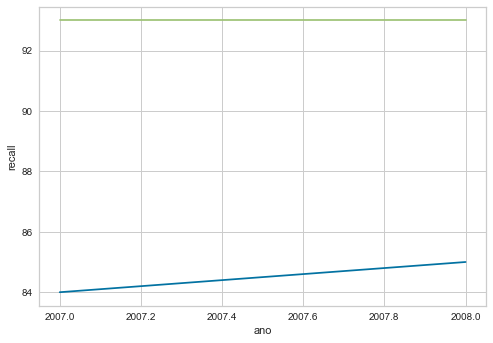

In [33]:
sns.lineplot(a['ano'], a['acuracia'])
sns.lineplot(a['ano'], a['recall'])

In [ ]:
# b = a.set_index('ano').stack().to_frame().reset_index()

In [ ]:
# sns.lineplot(b['ano'], b[0], hue=b['level_1']);

In [ ]:
# # procurando melhorar o modelo - mudando o threshold

# y_pred_thresh = model.predict_proba(X)[:,1] > 0.25
# y_pred_thresh

In [ ]:
# pd.DataFrame(confusion_matrix(y_true, y_pred_thresh))